In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

## Import the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

The following shows there  are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
train_images.shape

(60000, 28, 28)

Each label is an integer between 0 and 9:

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [6]:
test_images.shape

(10000, 28, 28)

## Preprocess the data

The data must be preprocessed before training  the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

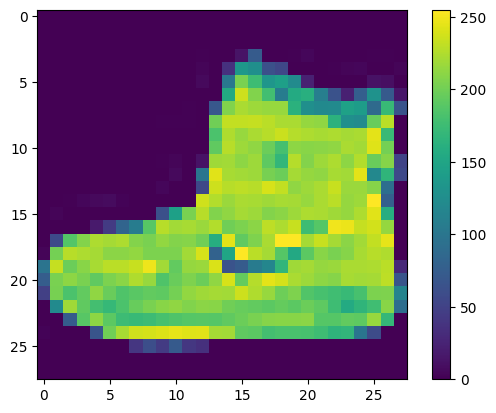

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False) 
plt.show()

Neural networks like normalized values so scale these values to a range of 0 and 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

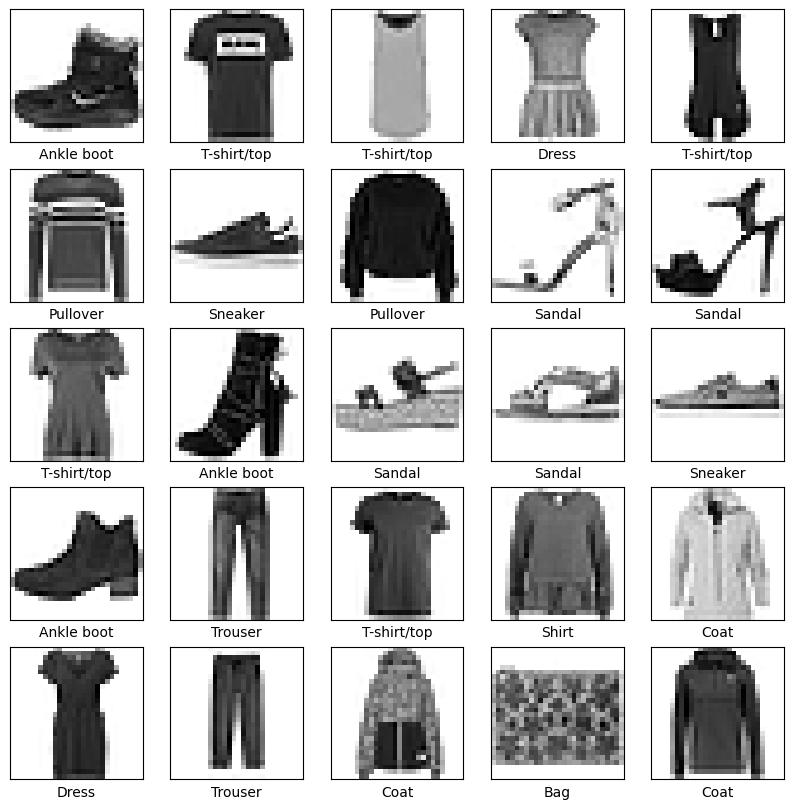

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Setup the layers

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

The first layer in the network, `tf.keras.layers.Flatten,` transforms the format of the images from a two-dimentional array (of 28 by 28 pixels) to a one-dimensional array (of 28*28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has np parameters to learn; it only reformats the data.

After the piexels are flattened the networks consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each unit contains a score the that indicated the current image belongs to one of the 10 classes.

## Compile the model

In [12]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

## Train the model

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 11s 5ms/step - loss: 0.4962 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3739 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3335 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3116 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2947 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2796 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2670 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2563 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2480 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2384 - accura

## Evaluate accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3289 - accuracy: 0.8855 - 759ms/epoch - 2ms/step

Test accuracy: 0.8855000138282776


In [19]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [21]:
tf.argmax(predictions[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [25]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

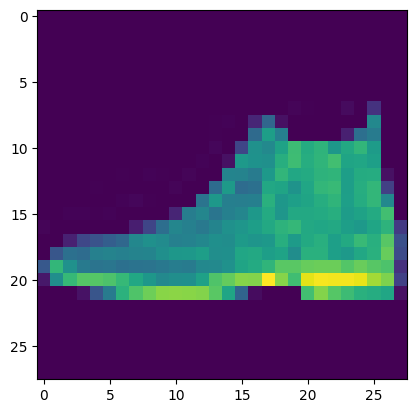

In [26]:
plt.imshow(test_images[0])
plt.show()

In [29]:
class_names[test_labels[0]]

'Ankle boot'

Graph this to look at the full set of 10 class predictions

In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

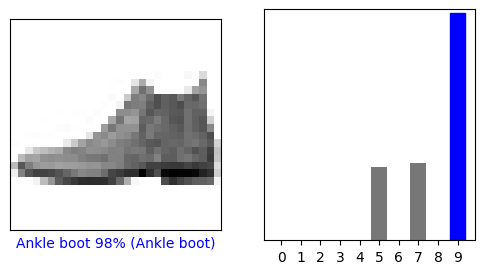

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

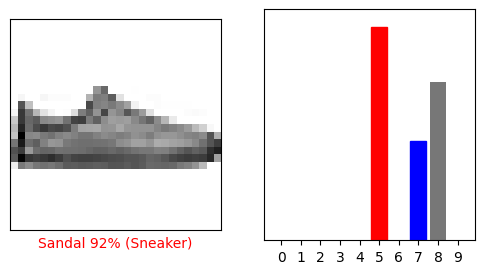

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

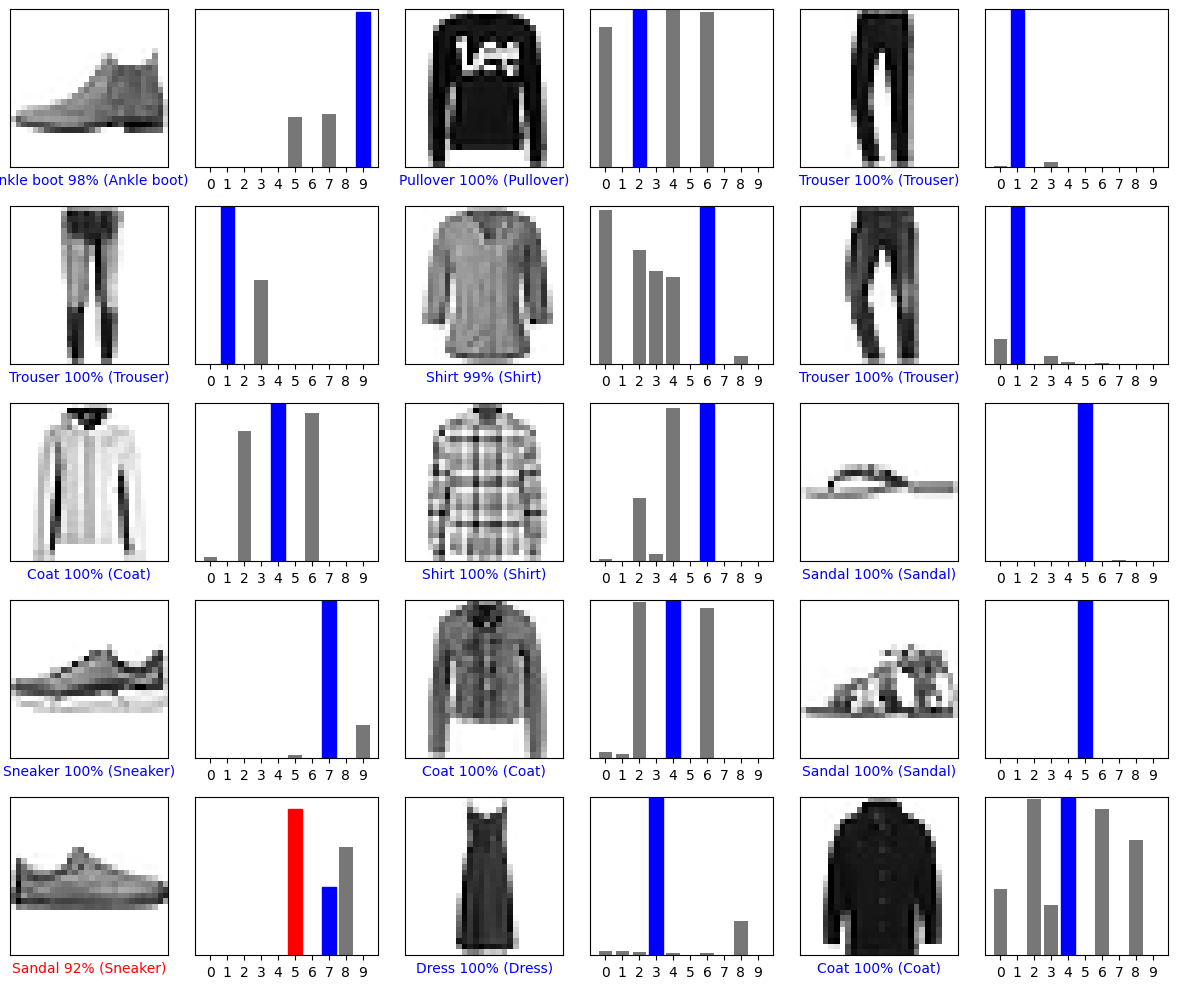

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the model to make a prediction about a single image.

In [48]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [49]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

img.shape

(1, 28, 28)

In [50]:
predictions_single = model.predict(img)
predictions_single

1/1 [==============================] - 0s 23ms/step


array([[2.4810704e-04, 3.6050724e-07, 7.1435015e-06, 1.8375566e-05,
        2.2869945e-06, 3.1665719e-01, 7.3381857e-06, 3.3387378e-01,
        1.4668492e-04, 9.8201752e-01]], dtype=float32)

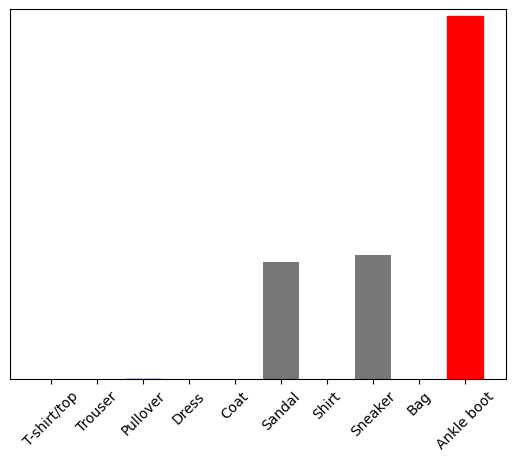

In [51]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [52]:
np.argmax(predictions_single[0])

9